# Lecture 2: Modelling and analysing a two-species model

This lecture:
- Example model
- Model challenges
- Last weeks challenges

# Cycles of predator in prey populations

One of the enigma's of the 19th century were the apparent cycles in the populations of Lynx and Hare that were reported by fur traders in Canada.

How these cycles could be explained was one of the more inspiring ecological questions in theoretical ecology in the 20th century.

![Python](http://faculty.ycp.edu/~kkleiner/ecology/lectureimages/HareLynx/Harelynxcycles.jpg)

# Predator-prey models

Here we describe and solve a model of the interaction between a predator and its prey, roughly following the Rosenzweig-MacArthur predator prey model:

*Rosenzweig, M. L. and R. H. MacArthur (1963). "Graphical representation and stability conditions of predator-prey interactions." The American Naturalist 97:209-223.*

The model describes the dynamics of a predator $P$ and its prey $N$, using the following differential equations:

$$
\begin{aligned}
\frac{dN}{dt}&= r(1-\frac{N}{K})N -c_{max} \frac{N}{N +k_{N}}P \\
\frac{dP}{dt}&= e c_{max} \frac{N}{N +k_{N}}P - mP
\end{aligned}
$$

Here, $r$ is the prey maximal growth rate, $K$ is the prey's carrying capcity, $c_{max}$ is the maximal predation rate, $k_{N}$ is the prey population density at which predation is half maximal, $e$ is the predator's population increase for every unit of prey consumed, and $m$m is the predators natural mortality rate.  

# Holling 2 functional response

Note that the model uses a Holling type 2 functional response, in which the predator conumption rate increases with prey density, but levels off to a maximum because the predator is saturated when intake gets really high, or because the handling and consumption (rather then the catching) of the prey takes all the predator's time. See Buzz Holling's paper:

*Holling, C. S. (1959). "The components of predation as revealed by a study of small-mammal predation of the European pine sawfly". The Canadian Entomologist 91:293–320.*

For a good explanation see: https://en.wikipedia.org/wiki/Functional_response

We don't follow Buzz's precise formulation, but something that is mathematically equivalent to it.  
Below follows a Python implementation.

### Importing some packages

In [1]:
%matplotlib inline
import numpy as np  
import matplotlib.pyplot as plt

### Model parameters

In [2]:
K      = 100.0        # 20   - Prey carrying capacity 
r      = 0.2          # 0.2  - Prey intrinsic growth rate

Cmax   = 1            # 1    - Maximal consumption rate of the predator
k_N    = 30           # 30   - Half saturation constant of Predator for Prey
e      = 0.2          # 0.2  - Predator assimilation coefficient
m      = 0.1          # 31   - Predator mortality rate

### Simulation settings

In [3]:
EndTime= 250          # The length of the simulation (arbitrary unit)
dt     = 0.5          # The time step of the simulation, determines accuracy

### Model definition

In [4]:
def dN_dt(N,P):  # The prey differential equation
    return r*N*(1-N/K) - Cmax*N/(k_N+N)*P

def dP_dt(N,P):  # The predator differential equation
    return e*Cmax*N/(k_N+N)*P - m*P

### Initial states
Here we define 1D arrays storing a value for each time step.

In [5]:
N = np.zeros(int(EndTime/dt)+1)  # A 1D array to contain the prey population 
P = np.zeros(int(EndTime/dt)+1)  # A 1D array to contain the predator population 
N[0] = K               # The prey's initial value, at carrying capacity
P[0] = 10.0            # The predator initial value

### The main simulation loop

In [6]:
for i in range(int(EndTime/dt)): 
    N[i+1] = N[i] + dt*dN_dt(N[i],P[i])
    P[i+1] = P[i] + dt*dP_dt(N[i],P[i])

### Plotting the results

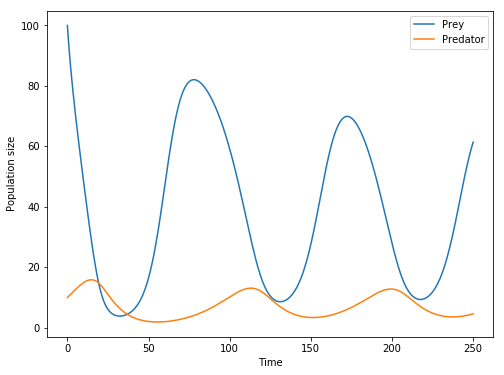

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(np.linspace(0,EndTime,len(N)),N, label=f'Prey')
ax.plot(np.linspace(0,EndTime,len(P)),P, label=f'Predator')
ax.legend()
a=plt.xlabel('Time')
b=plt.ylabel('Population size')

### A simple phase plane plot
To plot the isoclines in a phase plane plot, we have to define the values of *N* and *P* where *dN/dt* and *dP/dt* are zero. For the prey isocline, this is a curve that we can define as a function:

In [8]:
def Peq(N): return r*(1-N/K)*(N+k_N)/Cmax

For the predator isocline, this is defined as a vertical line, as there is a single values of *N* where the predator is in equilibrium:

In [9]:
Neq = (m*k_N/(e*Cmax-m))

Now we start with some graphics settings:

In [10]:
Pmax = 20
Nmax = K*1.1

### And then, we can make the phase plane plot:

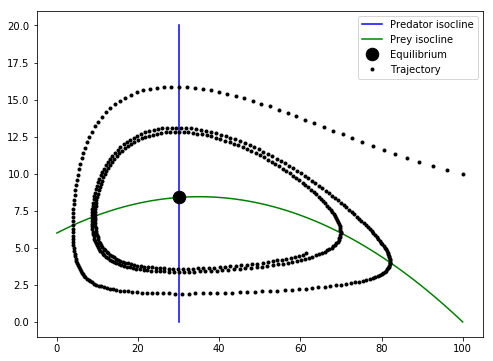

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

f=ax.plot( [Neq, Neq],[0, Pmax],'b-', label=f'Predator isocline' )
f=ax.plot( np.linspace(0,K,100),Peq(np.linspace(0,K,100)),'g-', label=f'Prey isocline' )
f=ax.plot( Neq,Peq(Neq),'k.', markersize=25, label=f'Equilibrium')
f=ax.plot( N,P, 'k.', label=f'Trajectory' )
f=ax.legend()

### A phase plane with isoclines and arrows indicating direction of change.
First, we define the settings and values for the plot

In [12]:
Pi, Ni = np.mgrid[0:20:20j, 0:(K*1.1):20j]  # Locations for the arrows
U = dN_dt(Ni,Pi)                            # Directions of the arrows
V = dP_dt(Ni,Pi)

S = np.sqrt(U*U+V*V)                        # Total speed computed
M = (np.hypot(U, V))                        # Norm of the growth rate 
M[ M == 0] = 1.                             # Avoid zero division errors 
U = U/M                                     # Normalize each arrows
V = V/M

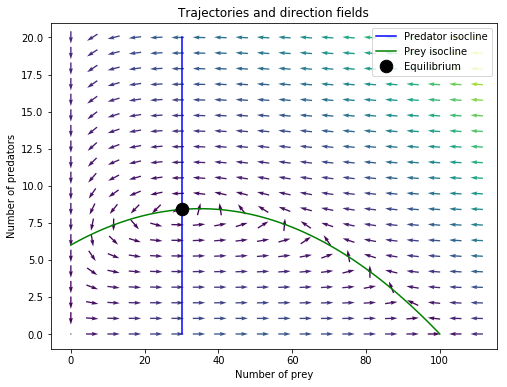

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
f=ax.quiver(Ni, Pi, U, V, S, pivot='mid') # Arrows are plotted here
f=ax.set_title('Trajectories and direction fields')
f=ax.set_xlabel('Number of prey')
f=ax.set_ylabel('Number of predators')

f=ax.plot( [Neq, Neq],[0, Pmax],'b-', label=f'Predator isocline' )
f=ax.plot( np.linspace(0,K,100),Peq(np.linspace(0,K,100)),'g-', label=f'Prey isocline' )
f=ax.plot( Neq,Peq(Neq),'k.', markersize=25, label=f'Equilibrium')
f=plt.legend()

### A phase plane plot with streamlines  

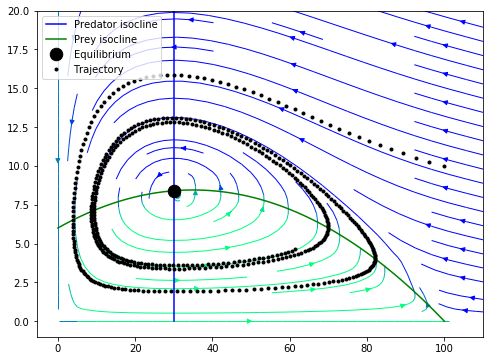

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
f=ax.streamplot(Ni, Pi, U, V, density=0.8, 
                color=U, linewidth=1, cmap='winter')

f=ax.plot( [Neq, Neq],[0, Pmax],'b-', label=f'Predator isocline' )
f=ax.plot( np.linspace(0,K,100),Peq(np.linspace(0,K,100)),'g-', label=f'Prey isocline' )
f=ax.plot( Neq,Peq(Neq),'k.', markersize=25, label=f'Equilibrium' )
f=ax.plot( N,P, 'k.', label=f'Trajectory' )
f=ax.legend(loc='upper left')

# Model challenges

The following topic are suggested
- The effect of different functional responses on predator-prey systems
- Modelling Lotka-Volterra competition
- Alternate stable states in biomfilms
- Competition by modifying the environent
- How long does it take to sink to the bottom
- Your idea

## Functional responses - do they matter (mild challenge)

A functional response describes the consumption rate of an individual consumer as a function of prey (or resource) density.

$
F(N) = c_{max} \frac{N}{N +k_{N}}P
$

There are several types of functional responses. 

![Functional response](https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/FunctionalResponsesGraph.svg/625px-FunctionalResponsesGraph.svg.png)

Do they matter?  
For an overview, see https://en.wikipedia.org/wiki/Functional_response


## Make a model of Lotka volterra competition (mild challenge)

The Lotka-volterra model of competition is a phenomenological model of the competitive interaction between two species.
![eqn1](https://wikimedia.org/api/rest_v1/media/math/render/svg/88c6f3f6a241ba6398452e1ffecff0aed08431ea)
![eqn2](https://wikimedia.org/api/rest_v1/media/math/render/svg/6240f4e238c336bc507d73836c5a4104ccf54fc8)
The model can similarly be analysed using phase plane analysis:

![plot](http://www.tiem.utk.edu/~gross/bioed/bealsmodules/competition.gph6.gif)

Make a phase plane analysis of the Lotka Volterra competition model, showing the 4 possible outcomes.  
For reference, see: http://www.webpages.uidaho.edu/wlf448/2004/2004lab/Lab11notes_competition.htm  


## Alternate stable states in biofilms (mild challange)

Diatoms can form biofilms on tidal flats as they excrete a slimy sugary substance called EPS. Sometimes it looks the diatoms form a two-phase patchiness on tidal flats, with thick mats alternating with highly erosive sediment.
<img src="Images/Diatoms.png" width="500" align="center" />
In the deep past, I wrote a paper about that with a two differential equation model that argued there would be two stable states. Analyse this model, compute the phase plane analysis, and see whether you agree with model.

Reference:
*van de Koppel, J., Herman, P.M., Thoolen, P. and Heip, C.H., 2001. Do alternate stable states occur in natural ecosystems? Evidence from a tidal flat. Ecology, 82(12), pp.3449-3461.*

## Competition by modifying the environent (tough challenge)
Bregje van Wesenbeeck once did a study on organisms that competed/interacted by modifying their environment. One species, Arenicola spec. made it more sandy, while the other, the grass Spartina Anglina, made it more clayey.

The paper that she published was:  
*Van Wesenbeeck, B.K., Van de Koppel, J., Herman, P.M.J., Bakker, J.P. and Bouma, T.J., 2007. Biomechanical warfare in ecology; negative interactions between species by habitat modification. Oikos, 116(5), pp.742-750.*

Make a model of this interaction based on the lotka volterra competition equationss, and analyse it!

## Challenge 5: How long does it take to drop to the bottom of the ocean (tough challenge)

If you would drop a iron ball in the ocean, how long does it take it to drop to the bottom. Also, how long would it take YOU to drop to the bottom of the ocean. Consider a homogeneous ocean (can be done analytically) or a heterogeneous ocean (simulate).

Idea: Roeland van der Vijsel

Copyright Johan van de Koppel, 2018